In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn import metrics

## 1.- Análisis de datos

#### Exploración

Dataset sacado de: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud#creditcard.csv

In [2]:
df = pd.read_csv('../Datasets/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Visualizaciones

In [8]:
# para visualizarlo
df_sample = df.sample(frac=0.2, random_state=42)
sns.set_palette("dark")

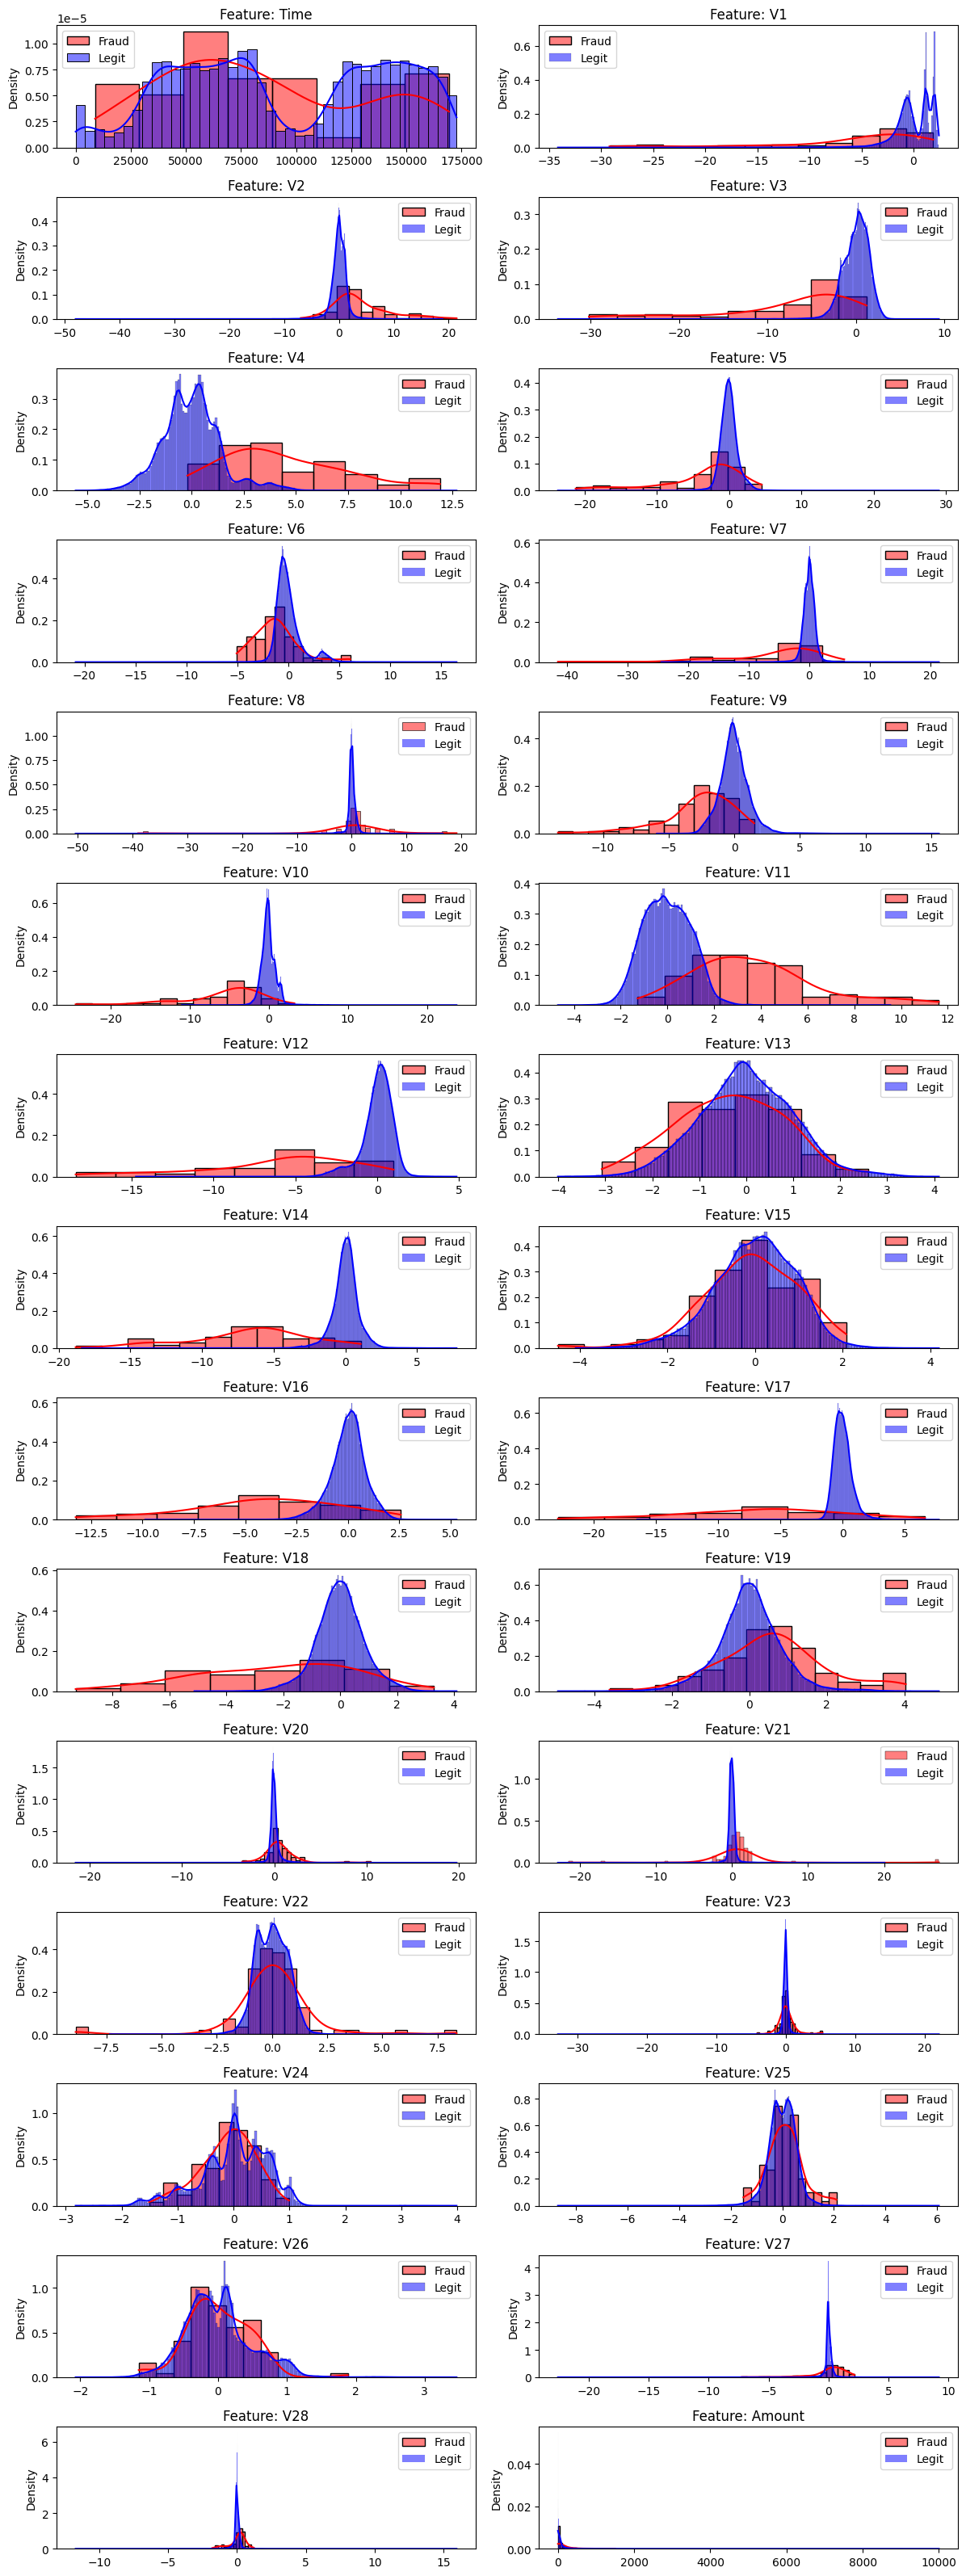

In [9]:
features = df_sample.drop("Class", axis=1)

plt.figure(figsize=(12, 32))

# Usamos subplots para crear los ejes
num_plots = len(features.columns)
num_rows = (num_plots + 1) // 2  # Número de filas
num_cols = 2  # Dos subgráficos por fila

for i, f in enumerate(features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    # Usando histplot para los casos donde Class == 1
    sns.histplot(data=df_sample[df_sample["Class"] == 1], x=f, kde=True, color="red", stat="density", label="Fraud", alpha=0.5)
    # Usando histplot para los casos donde Class == 0
    sns.histplot(data=df_sample[df_sample["Class"] == 0], x=f, kde=True, color="blue", stat="density", label="Legit", alpha=0.5)
    plt.xlabel('')
    plt.title(f"Feature: {f}")
    plt.legend()

plt.tight_layout()
plt.show()

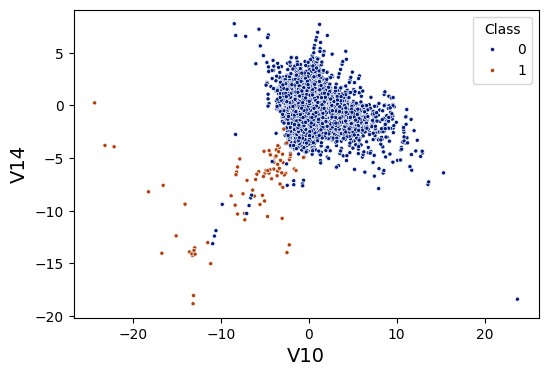

In [10]:
# Definir el tamaño de la figura
plt.figure(figsize=(6, 4))

# Utilizar seaborn para graficar el scatter plot
sns.scatterplot(x="V10", y="V14", hue="Class", data=df_sample, marker=".")

# Establecer etiquetas de los ejes
plt.xlabel("V10", fontsize=14)
plt.ylabel("V14", fontsize=14)

# Mostrar el gráfico
plt.show()

## 2.- Preprocesamiento de datos

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Eliminamos las columnas amount y time por que no son muy importantes y no estan escaladas

In [12]:
x = df.drop(['Class'], axis=1)

y = df['Class']

In [13]:
rf_model = RandomForestClassifier(n_estimators= 50, random_state= 42, n_jobs= -1)

rf_model.fit(x, y)

rf_model.feature_importances_

array([0.01214968, 0.01452769, 0.01445697, 0.02174168, 0.0284834 ,
       0.01165205, 0.01165503, 0.03318659, 0.01695166, 0.02334284,
       0.08037154, 0.03537322, 0.09547925, 0.0103973 , 0.17342906,
       0.01091875, 0.07490603, 0.16354558, 0.02597454, 0.01354371,
       0.0153942 , 0.01857999, 0.01026763, 0.00734505, 0.01009547,
       0.00844743, 0.02118111, 0.01416706, 0.00981284, 0.01262266])

In [14]:
# Obtener las importancias de las características
feature_importances = {name: score for name, score in zip(list(x), rf_model.feature_importances_)}

# Crear un DataFrame a partir del diccionario de importancias
feature_importances_df = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Importance'])

# Ordenar el DataFrame por importancia en orden descendente
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

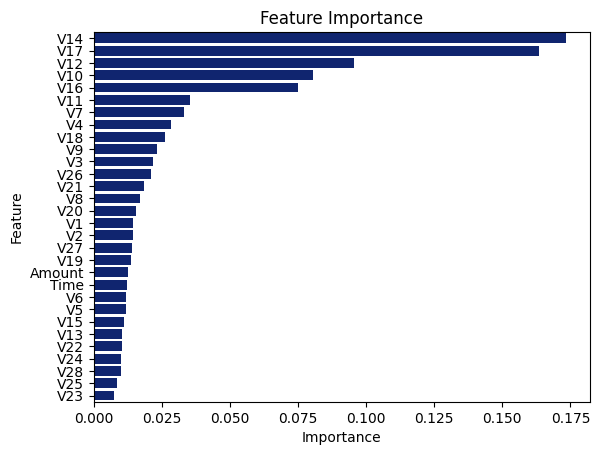

In [15]:
# Visualización de importancias
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, )
plt.title('Feature Importance')
plt.show()

In [16]:
selected_columns = feature_importances_df.head(7)['Feature'].tolist()
x = x[selected_columns].copy()

In [17]:
x.head()

,V14,V17,V12,V10,V16,V11,V7
0,-0.311169,0.207971,-0.617801,0.090794,-0.470401,-0.551600,0.239599
1,-0.143772,-0.114805,1.065235,-0.166974,0.463917,1.612727,-0.078803
2,-0.165946,1.109969,0.066084,0.207643,-2.890083,0.624501,0.791461
3,-0.287924,-0.684093,0.178228,-0.054952,-1.059647,-0.226487,0.237609
4,-1.119670,-0.237033,0.538196,0.753074,-0.451449,-0.822843,0.592941


## 3.- Entrenamiento

In [18]:
dbscan_model = DBSCAN(eps=0.70, min_samples=25)
dbscan_model.fit(x)

DBSCAN(eps=0.7, min_samples=25)

In [20]:
counter = Counter(dbscan_model.labels_.tolist())

bad_counter = Counter(dbscan_model.labels_[y == 1].tolist())

for key in sorted(counter.keys()):
    print("cluster {0}, {1} ejemplos - {2} malicioso".format(
        key, counter[key], bad_counter[key]))

cluster -1, 32678 ejemplos - 452 malicioso
cluster 0, 251817 ejemplos - 40 malicioso
cluster 1, 44 ejemplos - 0 malicioso
cluster 2, 70 ejemplos - 0 malicioso
cluster 3, 55 ejemplos - 0 malicioso
cluster 4, 25 ejemplos - 0 malicioso
cluster 5, 56 ejemplos - 0 malicioso
cluster 6, 26 ejemplos - 0 malicioso
cluster 7, 36 ejemplos - 0 malicioso


In [21]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [34]:
def purity_score(y, y_predict):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y, y_predict)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [35]:
# Obtenemos los clusters de dbscan
clusters = dbscan_model.labels_

In [36]:
 purity_score(y, clusters)

0.9982725143693799

In [37]:
metrics.silhouette_score(x, clusters, sample_size=10000)

0.1230410394155795

In [38]:
metrics.calinski_harabasz_score(x, clusters)

474.822812543557